## **Movie Reviews classification**

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [9]:
df.shape

(50000, 2)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Text(0.5, 1.0, 'Sentiment distribution')

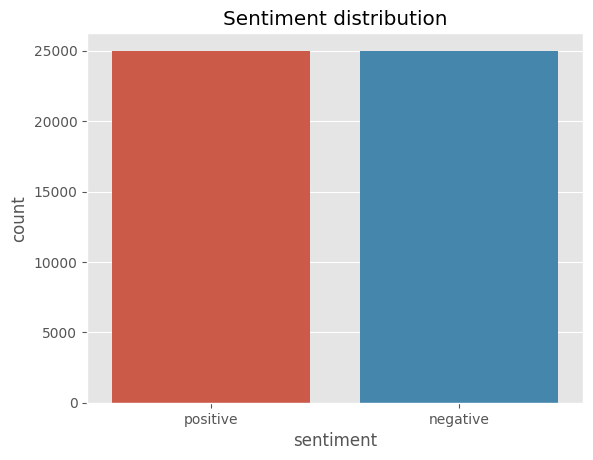

In [11]:
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment distribution")

In [68]:
for i in range(10):
    print("Review: ", [i])
    print(df['review'].iloc[i], "\n")
    print("Sentiment: ", df['sentiment'].iloc[i], "\n\n")

Review:  [0]
one reviewers mentioned watching 1 oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mann

In [13]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [14]:
df['word count'] = df['review'].apply(no_of_words)

In [69]:
df.head(10)

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
3,basically theres family little boy jake thinks...,0,67
4,petter matteis love time money visually stunni...,1,125
5,probably alltime favorite movie story selfless...,1,58
6,sure would like see resurrection dated seahunt...,1,76
7,show amazing fresh innovative idea 70s first a...,0,83
8,encouraged positive comments film looking forw...,0,64
9,like original gut wrenching laughter like movi...,1,17


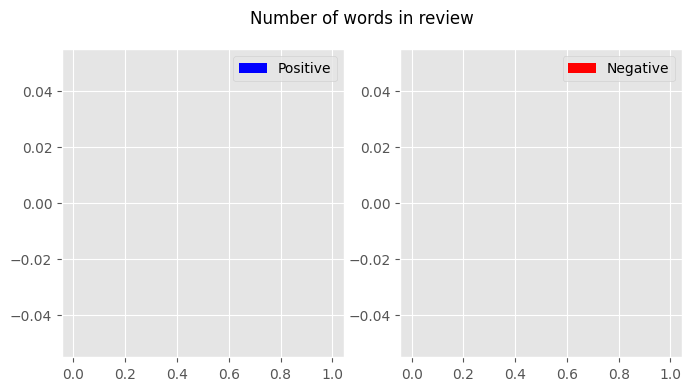

In [75]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0].hist(df[df['sentiment'] == 'positive']['word count'], label='Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['word count'], label='Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

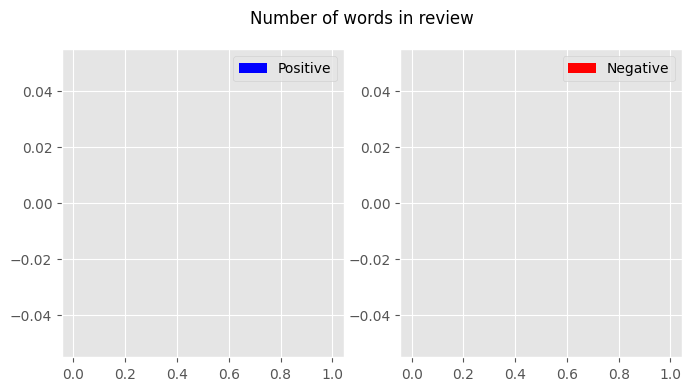

In [77]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0].hist(df[df['sentiment'] == 'positive']['review'].str.len(), label='Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['review'].str.len(), label='Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

In [18]:
df.sentiment.replace("positive", 1, inplace=True)
df.sentiment.replace("negative", 0, inplace=True)

In [19]:
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


In [20]:
def data_processing(text):
    text = text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^\w\s]','', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
df.review = df['review'].apply(data_processing)

In [30]:
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  421


In [31]:
df = df.drop_duplicates('review')

In [32]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [33]:
df.review = df['review'].apply(lambda x: stemming(x))

In [34]:
df['word count'] = df['review'].apply(no_of_words)
df.head()

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
3,basically theres family little boy jake thinks...,0,67
4,petter matteis love time money visually stunni...,1,125


In [35]:
pos_reviews = df[df.sentiment ==1]
pos_reviews.head()

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
4,petter matteis love time money visually stunni...,1,125
5,probably alltime favorite movie story selfless...,1,58


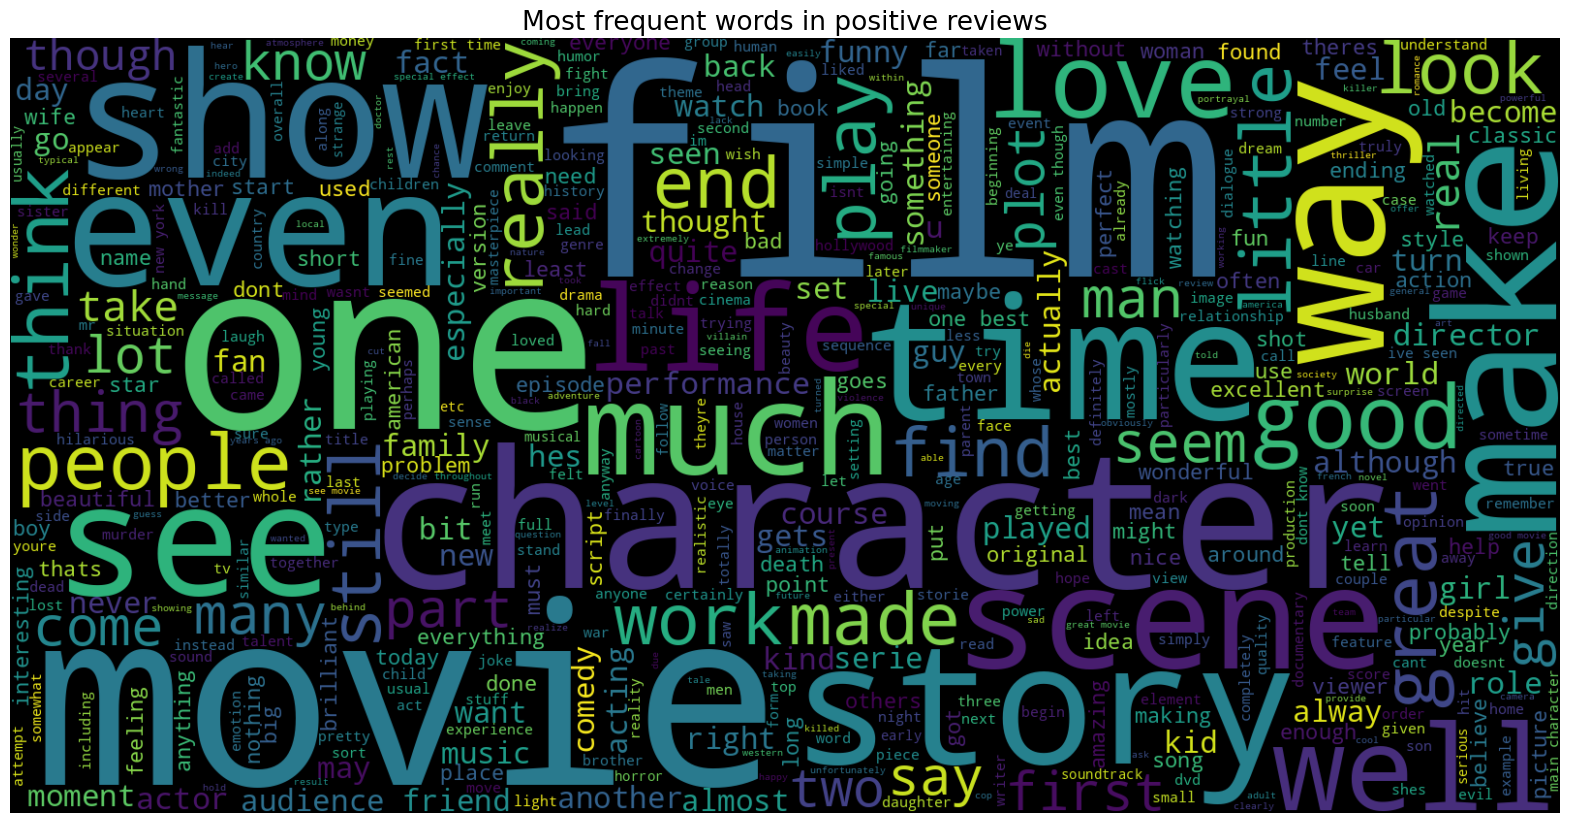

In [36]:
text = ' '.join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [37]:
from collections import Counter
count = Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('film', 39285),
 ('movie', 35830),
 ('one', 25621),
 ('like', 16998),
 ('good', 14281),
 ('great', 12568),
 ('story', 12338),
 ('see', 11814),
 ('time', 11724),
 ('well', 10930),
 ('really', 10638),
 ('also', 10516),
 ('would', 10320),
 ('even', 9318),
 ('much', 8971)]

In [38]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
pos_words.head()

,word,count
0,film,39285
1,movie,35830
2,one,25621
3,like,16998
4,good,14281


In [39]:
px.bar(pos_words, x='count', y='word', title='Common words in positive reviews', color='word')

In [40]:
neg_reviews = df[df.sentiment == 0]
neg_reviews.head()

,review,sentiment,word count
3,basically theres family little boy jake thinks...,0,67
7,show amazing fresh innovative idea 70s first a...,0,83
8,encouraged positive comments film looking forw...,0,64
10,phil alien one quirky films humour based aroun...,0,51
11,saw movie 12 came recall scariest scene big bi...,0,84


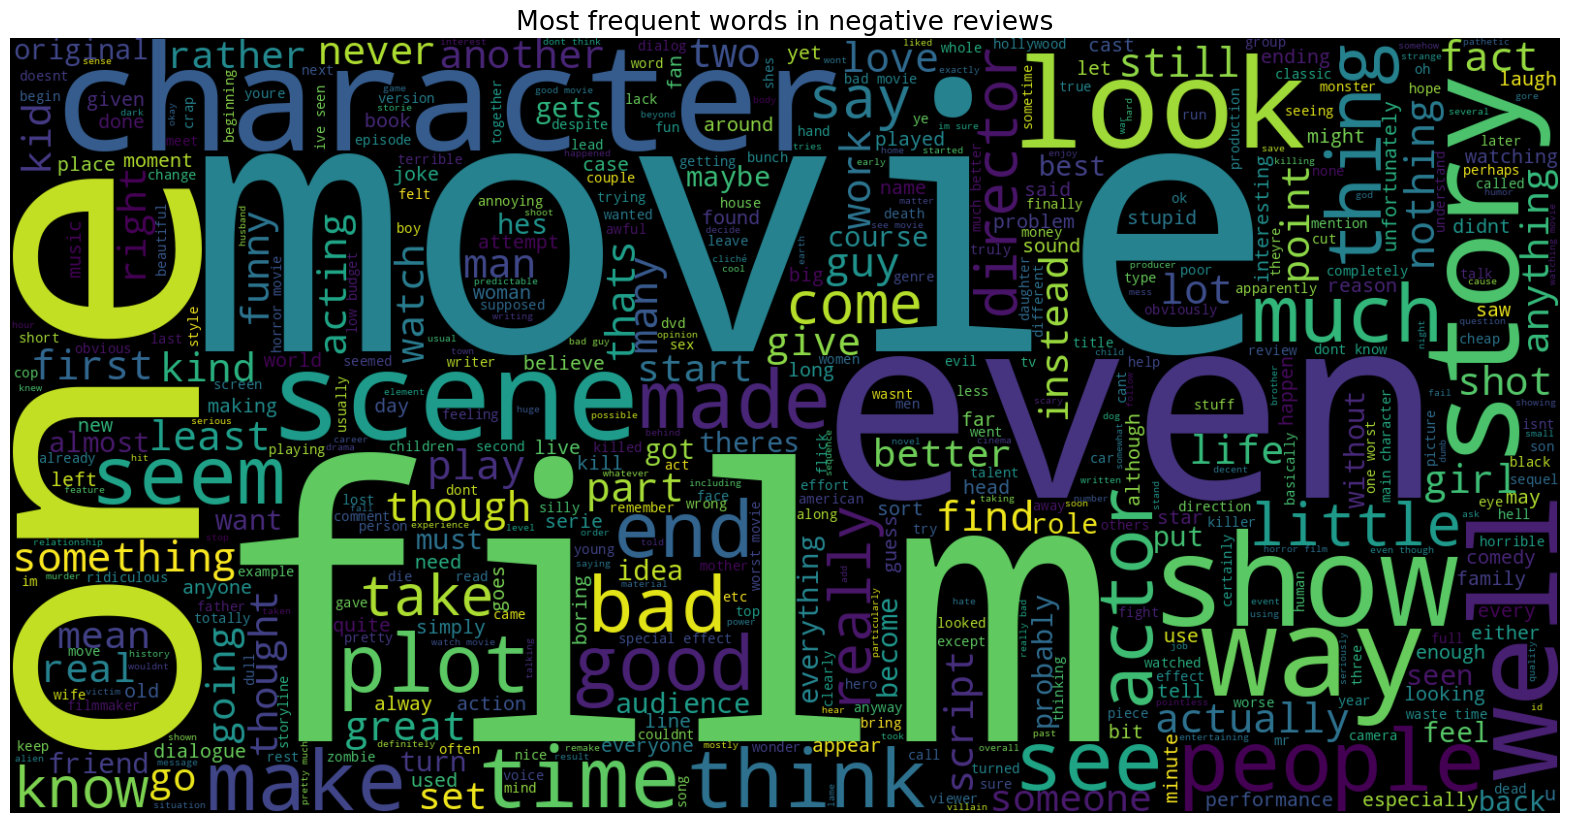

In [41]:
text = ' '.join([word for word in neg_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative reviews', fontsize = 19)
plt.show()

In [42]:
count = Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word] += 1
count.most_common(15)

[('movie', 47001),
 ('film', 34651),
 ('one', 24361),
 ('like', 21508),
 ('even', 14759),
 ('good', 13995),
 ('bad', 13903),
 ('would', 13482),
 ('really', 12084),
 ('time', 11349),
 ('see', 10412),
 ('dont', 9912),
 ('get', 9884),
 ('much', 9758),
 ('story', 9563)]

In [43]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
neg_words.head()

,word,count
0,movie,47001
1,film,34651
2,one,24361
3,like,21508
4,even,14759


In [44]:
px.bar(neg_words, x='count', y='word', title='Common words in negative reviews', color='word')

In [45]:
X = df['review']
Y = df['sentiment']

In [46]:
vect = TfidfVectorizer()
X = vect.fit_transform(df['review'])

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [48]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (34704, 221707)
Size of y_train:  (34704,)
Size of x_test:  (14874, 221707)
Size of y_test:  (14874,)


In [49]:
x_train = x_train[:2000]
y_train = y_train[:2000]
x_test = x_test[:500]
y_test = y_test[:500]

In [50]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (2000, 221707)
Size of y_train:  (2000,)
Size of x_test:  (500, 221707)
Size of y_test:  (500,)


In [51]:
x_train = x_train.toarray()
x_test = x_test.toarray()

In [52]:
from keras.models import Sequential
from keras.layers import Dense

In [53]:
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [54]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [55]:
history = model.fit(x_train, y_train, batch_size=10, epochs=20)

Epoch 1/20
200/200 [==============================] - 14s 54ms/step - loss: 0.6522 - accuracy: 0.7300
Epoch 2/20
200/200 [==============================] - 8s 40ms/step - loss: 0.4160 - accuracy: 0.9280
Epoch 3/20
200/200 [==============================] - 7s 35ms/step - loss: 0.1860 - accuracy: 0.9680
Epoch 4/20
200/200 [==============================] - 8s 40ms/step - loss: 0.0797 - accuracy: 0.9825
Epoch 5/20
200/200 [==============================] - 7s 35ms/step - loss: 0.0357 - accuracy: 0.9935
Epoch 6/20
200/200 [==============================] - 8s 40ms/step - loss: 0.0168 - accuracy: 0.9980
Epoch 7/20
200/200 [==============================] - 8s 40ms/step - loss: 0.0084 - accuracy: 0.9990
Epoch 8/20
200/200 [==============================] - 7s 37ms/step - loss: 0.0044 - accuracy: 0.9990
Epoch 9/20
200/200 [==============================] - 8s 40ms/step - loss: 0.0033 - accuracy: 0.9995
Epoch 10/20
200/200 [==============================] - 7s 36ms/step - loss: 0.0025 - accur

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                3547328   
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3,547,473
Trainable params: 3,547,473
Non-trainable params: 0
_________________________________________________________________


In [57]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

16/16 [==============================] - 1s 20ms/step - loss: 0.5120 - accuracy: 0.8640
Test loss: 0.5119786858558655
Test accuracy: 0.8640000224113464


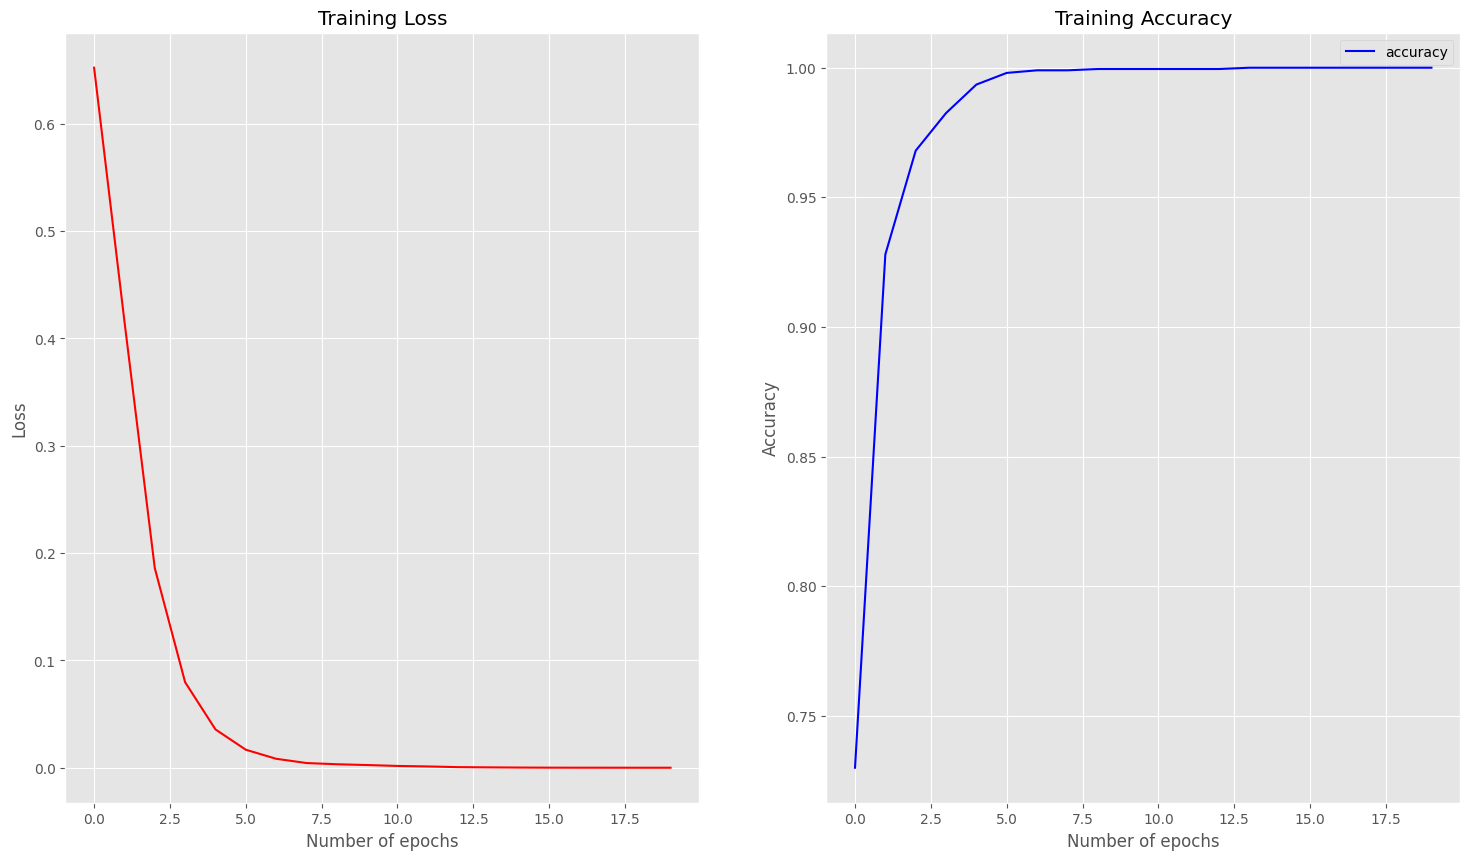

In [59]:
plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], color='r', label='loss')
plt.title('Training Loss')
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], color='b', label='accuracy')
plt.title('Training Accuracy')
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [60]:
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [61]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [63]:
history = model.fit(x_train, y_train, batch_size=10, epochs=20)

Epoch 1/20
200/200 [==============================] - 10s 47ms/step - loss: 0.1834 - accuracy: 0.9720
Epoch 2/20
200/200 [==============================] - 9s 46ms/step - loss: 0.0363 - accuracy: 0.9990
Epoch 3/20
200/200 [==============================] - 9s 42ms/step - loss: 0.0134 - accuracy: 0.9995
Epoch 4/20
200/200 [==============================] - 9s 45ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 5/20
200/200 [==============================] - 9s 46ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 6/20
200/200 [==============================] - 9s 44ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 7/20
200/200 [==============================] - 9s 43ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 8/20
200/200 [==============================] - 9s 46ms/step - loss: 7.9442e-04 - accuracy: 1.0000
Epoch 9/20
200/200 [==============================] - 9s 44ms/step - loss: 5.6064e-04 - accuracy: 1.0000
Epoch 10/20
200/200 [==============================] - 9s 42ms/step - loss: 4.0685

In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                3547328   
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3,547,473
Trainable params: 3,547,473
Non-trainable params: 0
_________________________________________________________________


In [65]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

16/16 [==============================] - 1s 27ms/step - loss: 0.4427 - accuracy: 0.8360
Test loss: 0.44269856810569763
Test accuracy: 0.8360000252723694


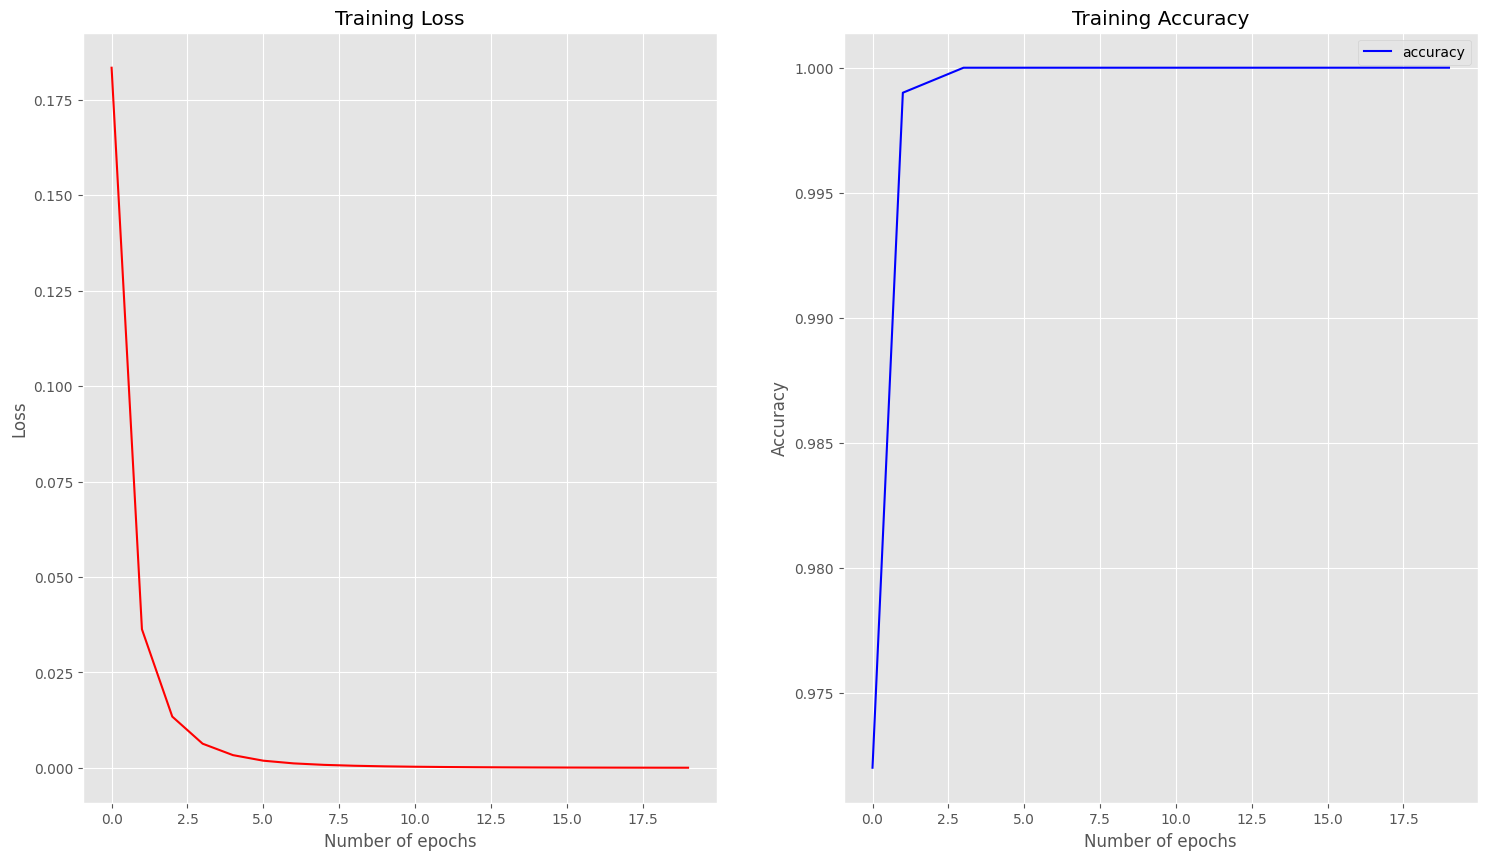

In [67]:
plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], color='r', label='loss')
plt.title('Training Loss')
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], color='b', label='accuracy')
plt.title('Training Accuracy')
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [81]:
! Jupyter nbconvert -- to html  Movie Reviews classification.ipynb

/bin/bash: line 1: Jupyter: command not found
